<a href="https://www.kaggle.com/code/shubkumarop/nlp-using-transferlearning?scriptVersionId=134635316" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/universal-sentence-encoder/tensorflow2/universal-sentence-encoder/2/saved_model.pb
/kaggle/input/universal-sentence-encoder/tensorflow2/universal-sentence-encoder/2/variables/variables.index
/kaggle/input/universal-sentence-encoder/tensorflow2/universal-sentence-encoder/2/variables/variables.data-00000-of-00001


# Settiing up the training and the test data

In [2]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [4]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(),
                                                                            train_df["target"].to_numpy(),
                                                                            test_size=0.1, 
                                                                            random_state=42)

In [5]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

# Building a function to evluated the results

In [6]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_result(y_true,y_pred):
    model_accuracy = accuracy_score(y_true,y_pred)*100
    model_precision, model_recall, model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
    model_result = {"accuracy":model_accuracy,
                    "precision":model_precision,
                    "recall":model_recall,
                    "f1":model_f1}
    return model_result

# Model Development
# Transfer learning
**Making model and training**
**Using universe sentence encoder as our model to fit and train our data**


# Model architecture
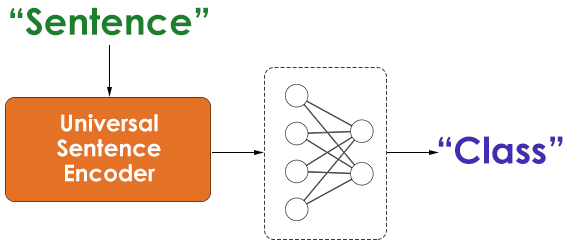

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
sentence_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                 input_shape=[],
                                 dtype=tf.string,
                                 trainable=False,
                                 )

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [8]:
model = tf.keras.Sequential([
    sentence_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [10]:
model_history = model.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels))

Epoch 1/10
215/215 [==============================] - 13s 19ms/step - loss: 0.5082 - accuracy: 0.7707 - val_loss: 0.4259 - val_accuracy: 0.8045
Epoch 2/10
215/215 [==============================] - 3s 16ms/step - loss: 0.4170 - accuracy: 0.8126 - val_loss: 0.4118 - val_accuracy: 0.8215
Epoch 3/10
215/215 [==============================] - 4s 17ms/step - loss: 0.4046 - accuracy: 0.8232 - val_loss: 0.4034 - val_accuracy: 0.8176
Epoch 4/10
215/215 [==============================] - 3s 15ms/step - loss: 0.3947 - accuracy: 0.8266 - val_loss: 0.4010 - val_accuracy: 0.8176
Epoch 5/10
215/215 [==============================] - 3s 15ms/step - loss: 0.3893 - accuracy: 0.8286 - val_loss: 0.3980 - val_accuracy: 0.8255
Epoch 6/10
215/215 [==============================] - 3s 16ms/step - loss: 0.3833 - accuracy: 0.8346 - val_loss: 0.3971 - val_accuracy: 0.8189
Epoch 7/10
215/215 [==============================] - 4s 17ms/step - loss: 0.3777 - accuracy: 0.8355 - val_loss: 0.4034 - val_accuracy: 0.830

# Plotting the loss and accuracy 

In [11]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

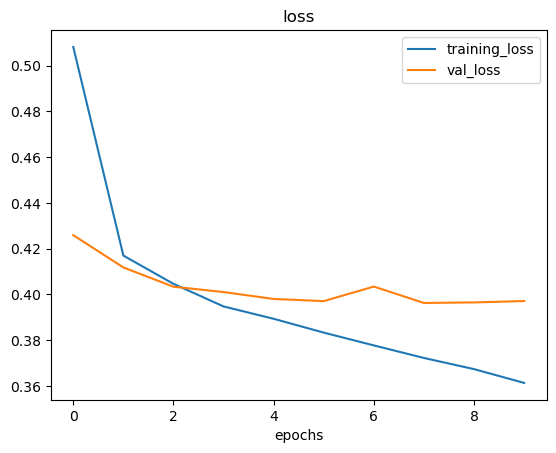

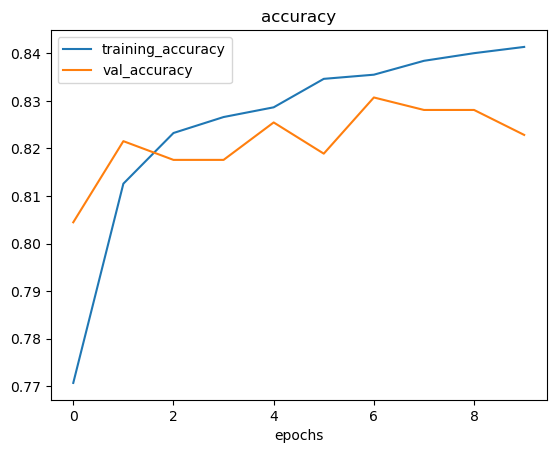

In [12]:
plot_loss_curves(model_history)

In [13]:
val_sentences[:10]

array(['So you have a new weapon that can cause un-imaginable destruction.',
       'The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@',
       'DT @georgegalloway: RT @Galloway4Mayor: \x89ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q',
       'Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.',
       'in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3',
       '@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time',
       'my favorite lady came to our volunteer meeting\nhopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS',
       '@brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS',
       "Can't f

In [14]:
test_df = test_df['text'].to_numpy()

# Model testing

In [15]:
model_pred_probs = model.predict(val_sentences)
model_preds = tf.squeeze(tf.round(model_pred_probs))
model_preds[:10]

24/24 [==============================] - 1s 12ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [16]:
model_results = calculate_result(val_labels, model_preds)
model_results

{'accuracy': 82.28346456692913,
 'precision': 0.8246838077031926,
 'recall': 0.8228346456692913,
 'f1': 0.8210348416682302}

In [17]:
pred_prob = model.predict(test_df)
pred_prob

102/102 [==============================] - 1s 12ms/step


array([[0.573116  ],
       [0.9132941 ],
       [0.80667984],
       ...,
       [0.96196336],
       [0.73062694],
       [0.6568351 ]], dtype=float32)

In [18]:
preds = tf.squeeze(tf.round(pred_prob))
preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

# Submission

In [19]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission["target"] = tf.dtypes.cast(preds, tf.int32)

In [20]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [21]:
sample_submission.to_csv('submission.csv', index=False)